## About the Data?

- Analyzing the Impact of Tree Species Diversity on Foliar Fungal Disease Incidence in European Forests.

- European forests face a growing threat from foliar fungal pathogens, with potential consequences for forest ecosystems and their functioning.

- we aim to address is to understand how tree species diversity influences the incidence of foliar fungal diseases in European forests.

In [42]:
from google.colab import drive
#ignoring unncessary warnings
import warnings
warnings.filterwarnings('ignore')


drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Nguyen_FungalPathogen_EcolEvol2.csv')

In [44]:
df.head()

,Country,ID_Plot,Species,tree.id,P_Species_richness,P_Sha_st_focsp,P_Sha_ind_focsp,P_Compo,FxnGr,MPD,...,rust.current,cast.current,healthy.current,ndl.tot.current,OtherFungi,OtherFungi.healthy,OtherFungi.total,damage.foliage,healthy.foliage,total.foliage
0,Finland,FIN01,PICABI,FIN01_41,2,0.597012,0.781552,PaPs,Conifer,129.973603,...,2,0,18,20,0,0,0,2,18,20
1,Finland,FIN01,PICABI,FIN01_58,2,0.597012,0.781552,PaPs,Conifer,129.973603,...,4,0,16,20,0,0,0,4,16,20
2,Finland,FIN01,PICABI,FIN01_3,2,0.597012,0.781552,PaPs,Conifer,129.973603,...,4,0,16,20,0,0,0,4,16,20
3,Finland,FIN01,PINSYL,FIN01_28,2,0.597012,0.781552,PaPs,Conifer,129.973603,...,0,0,20,20,0,0,0,0,20,20
4,Finland,FIN01,PINSYL,FIN01_67,2,0.597012,0.781552,PaPs,Conifer,129.973603,...,0,0,20,20,0,0,0,0,20,20


# Data Preprocessing EDA(Exploratry Data Analysis)

- Data cleaning
- outlier detection
- Data visualization
- PCA

In [45]:
# True if duplicates are present
df.duplicated().any()

False

In [46]:
# Describe columns
df.isnull().any()

Country               False
ID_Plot               False
Species               False
tree.id               False
P_Species_richness    False
P_Sha_st_focsp        False
P_Sha_ind_focsp       False
P_Compo               False
FxnGr                 False
MPD                   False
sq.MPD                False
Latitude              False
mildew                False
m.healthy             False
m.total               False
spots                 False
s.healthy             False
s.total               False
rust.current          False
cast.current          False
healthy.current       False
ndl.tot.current       False
OtherFungi            False
OtherFungi.healthy    False
OtherFungi.total      False
damage.foliage        False
healthy.foliage       False
total.foliage         False
dtype: bool

In [47]:
# lets try to check the missing values of each column in a dataset
df.isnull().sum()

Country               0
ID_Plot               0
Species               0
tree.id               0
P_Species_richness    0
P_Sha_st_focsp        0
P_Sha_ind_focsp       0
P_Compo               0
FxnGr                 0
MPD                   0
sq.MPD                0
Latitude              0
mildew                0
m.healthy             0
m.total               0
spots                 0
s.healthy             0
s.total               0
rust.current          0
cast.current          0
healthy.current       0
ndl.tot.current       0
OtherFungi            0
OtherFungi.healthy    0
OtherFungi.total      0
damage.foliage        0
healthy.foliage       0
total.foliage         0
dtype: int64

In [48]:
df.shape

(1605, 28)

In [49]:
#checking the general information of all columns in dataset`
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             1605 non-null   object 
 1   ID_Plot             1605 non-null   object 
 2   Species             1605 non-null   object 
 3   tree.id             1605 non-null   object 
 4   P_Species_richness  1605 non-null   int64  
 5   P_Sha_st_focsp      1605 non-null   float64
 6   P_Sha_ind_focsp     1605 non-null   float64
 7   P_Compo             1605 non-null   object 
 8   FxnGr               1605 non-null   object 
 9   MPD                 1605 non-null   float64
 10  sq.MPD              1605 non-null   float64
 11  Latitude            1605 non-null   float64
 12  mildew              1605 non-null   int64  
 13  m.healthy           1605 non-null   int64  
 14  m.total             1605 non-null   int64  
 15  spots               1605 non-null   int64  
 16  s.heal

In [50]:
#Total columns
df.columns

Index(['Country', 'ID_Plot', 'Species', 'tree.id', 'P_Species_richness',
       'P_Sha_st_focsp', 'P_Sha_ind_focsp', 'P_Compo', 'FxnGr', 'MPD',
       'sq.MPD', 'Latitude', 'mildew', 'm.healthy', 'm.total', 'spots',
       's.healthy', 's.total', 'rust.current', 'cast.current',
       'healthy.current', 'ndl.tot.current', 'OtherFungi',
       'OtherFungi.healthy', 'OtherFungi.total', 'damage.foliage',
       'healthy.foliage', 'total.foliage'],
      dtype='object')

In [51]:
df.describe()

,P_Species_richness,P_Sha_st_focsp,P_Sha_ind_focsp,MPD,sq.MPD,Latitude,mildew,m.healthy,m.total,spots,...,rust.current,cast.current,healthy.current,ndl.tot.current,OtherFungi,OtherFungi.healthy,OtherFungi.total,damage.foliage,healthy.foliage,total.foliage
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,...,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,2.590031,0.856409,0.838267,361.396055,16.773226,49.216181,2.721495,3.391900,6.113396,6.277259,...,0.178816,0.011215,6.403738,6.600000,0.895327,30.446729,31.341433,9.938318,34.116511,44.054829
std,1.116706,0.441106,0.406063,239.199085,8.124265,6.487970,10.556537,11.962235,17.697925,12.981178,...,1.100238,0.244386,9.173799,9.385921,4.797158,27.862513,28.329299,15.977987,18.609741,18.047305
min,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.614848,0.626766,123.204568,11.055702,43.120000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000
50%,3.000000,0.945329,0.932152,413.750001,19.088506,51.070000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,1.000000,30.000000,50.000000
75%,3.000000,1.218252,1.120864,581.150274,23.934388,52.770000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,20.000000,20.000000,0.000000,60.000000,60.000000,13.000000,50.000000,60.000000
max,5.000000,1.569394,1.500901,650.000005,25.495098,63.020000,60.000000,60.000000,101.000000,56.000000,...,11.000000,7.000000,20.000000,20.000000,47.000000,77.000000,105.000000,60.000000,77.000000,105.000000


In [52]:
# In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest
# in the include parameter.
df.describe(include=['bool','object'])

,Country,ID_Plot,Species,tree.id,P_Compo,FxnGr
count,1605,1605,1605,1605,1605,1605
unique,6,209,16,1605,93,2
top,Poland,ITA34,PICABI,FIN01_41,FsFeAp,Broadleaved
freq,378,15,220,1,62,1073


In [53]:
df = df.drop(['spots', 'damage.foliage'], axis=1)

In [54]:
#list for catagorical columns
cat_cols = []
#list for numerical columns
num_cols = []

for i in df.columns:
    if df[i].dtypes =='object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [55]:
print(cat_cols)
print("Length of catagorical columns : ",len(cat_cols))

['Country', 'ID_Plot', 'Species', 'tree.id', 'P_Compo', 'FxnGr']
Length of catagorical columns :  6


In [56]:
print(num_cols)
print("Length of numerical columns : ",len(num_cols))

['P_Species_richness', 'P_Sha_st_focsp', 'P_Sha_ind_focsp', 'MPD', 'sq.MPD', 'Latitude', 'mildew', 'm.healthy', 'm.total', 's.healthy', 's.total', 'rust.current', 'cast.current', 'healthy.current', 'ndl.tot.current', 'OtherFungi', 'OtherFungi.healthy', 'OtherFungi.total', 'healthy.foliage', 'total.foliage']
Length of numerical columns :  20


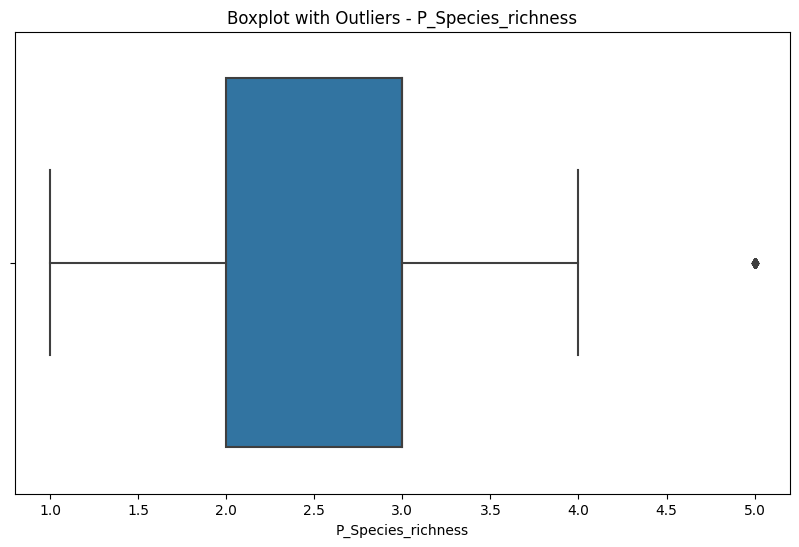

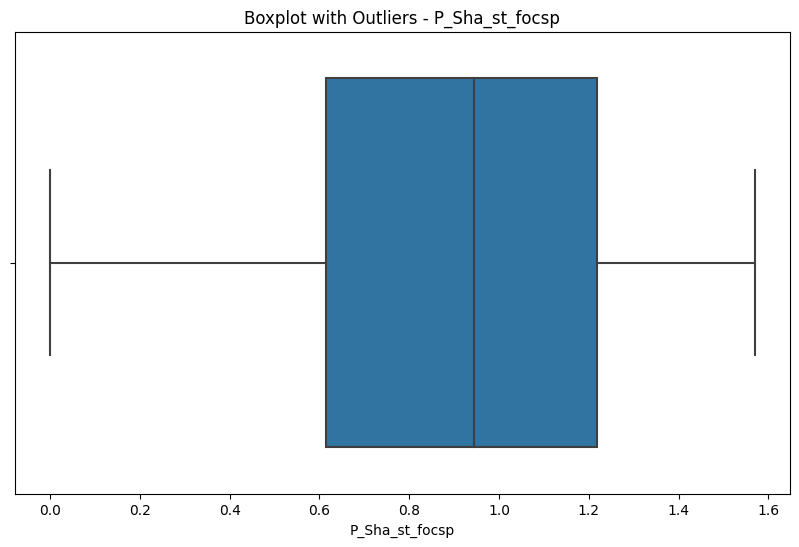

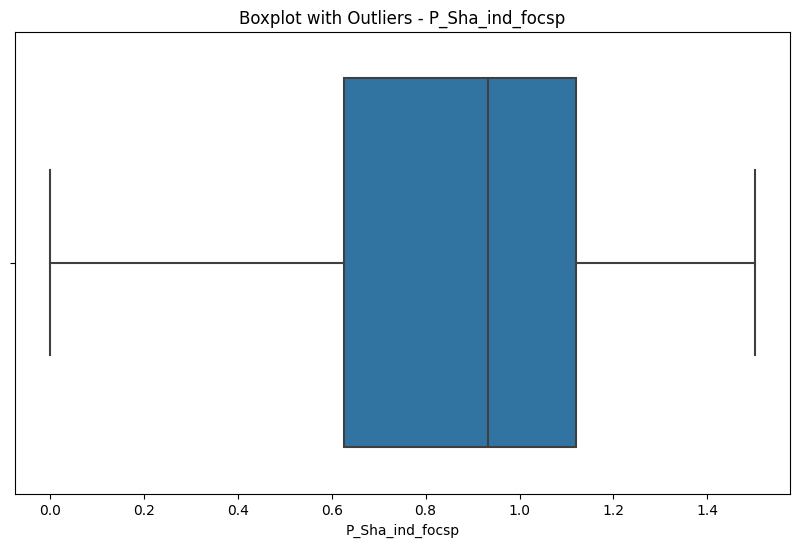

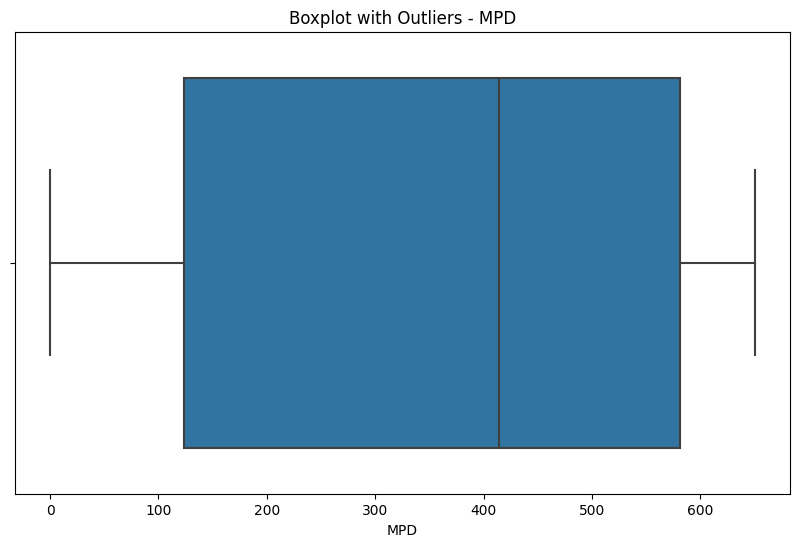

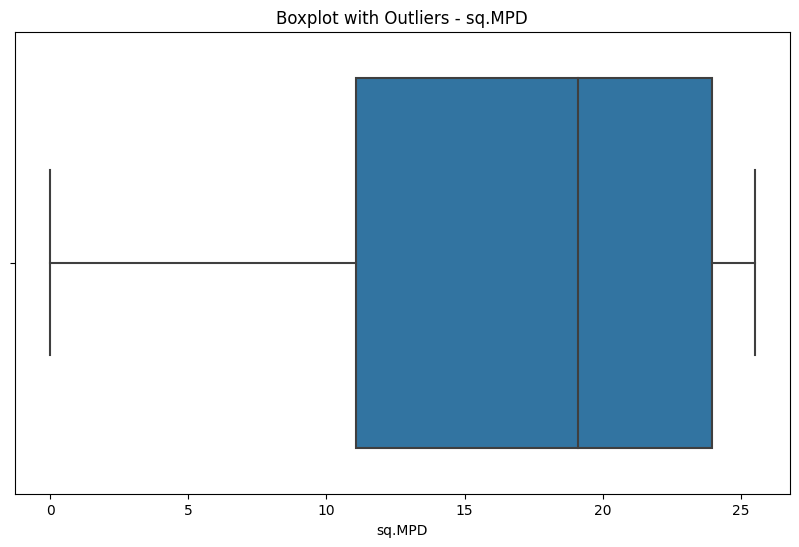

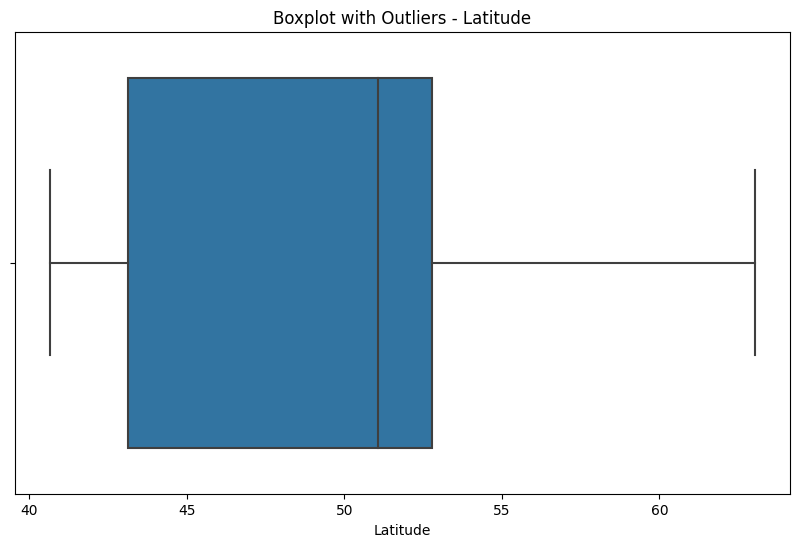

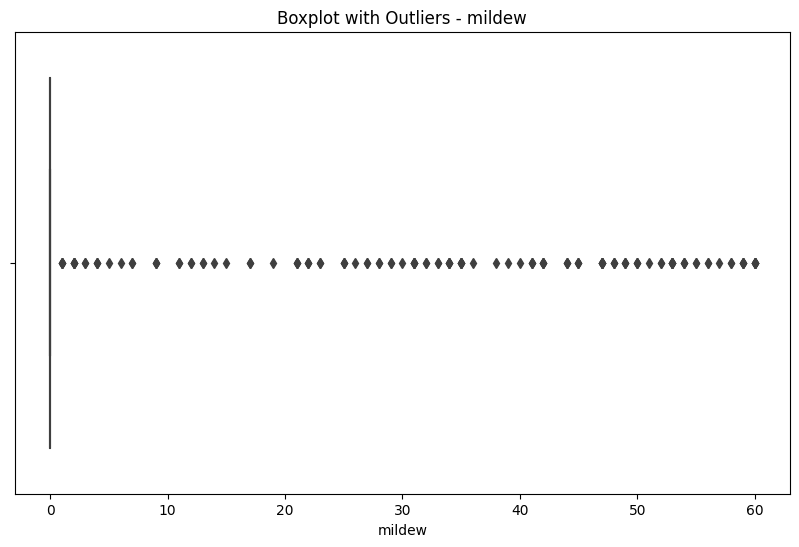

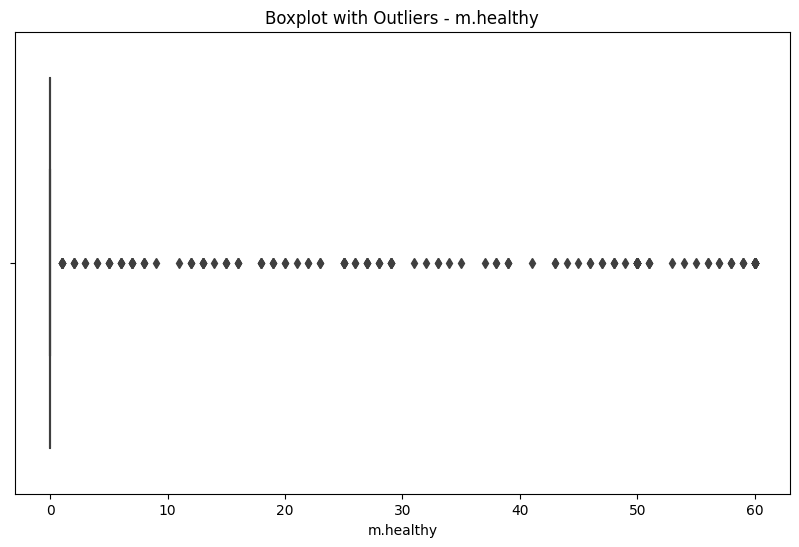

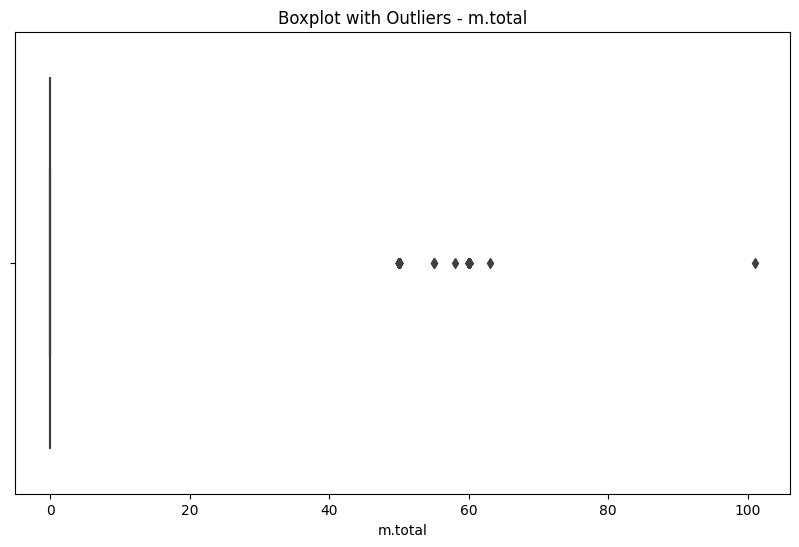

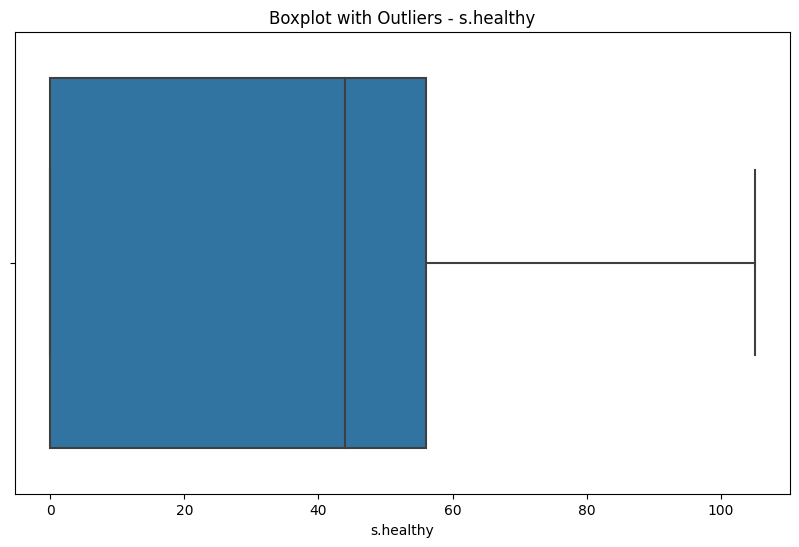

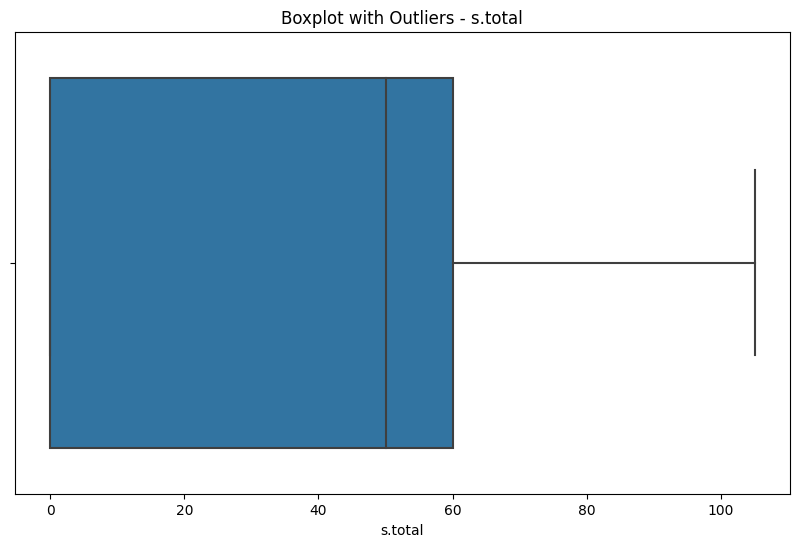

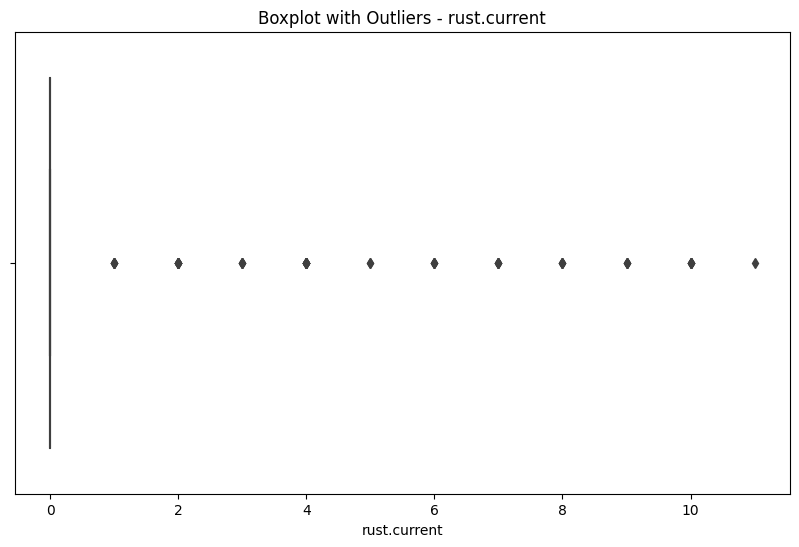

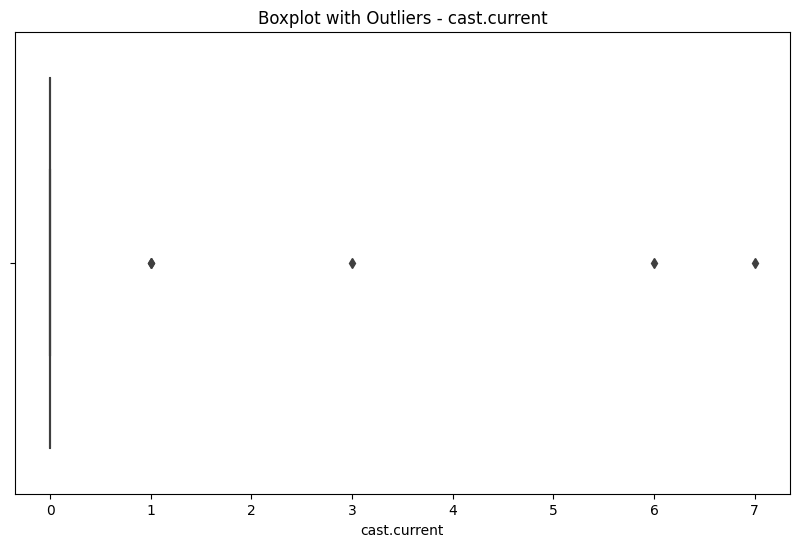

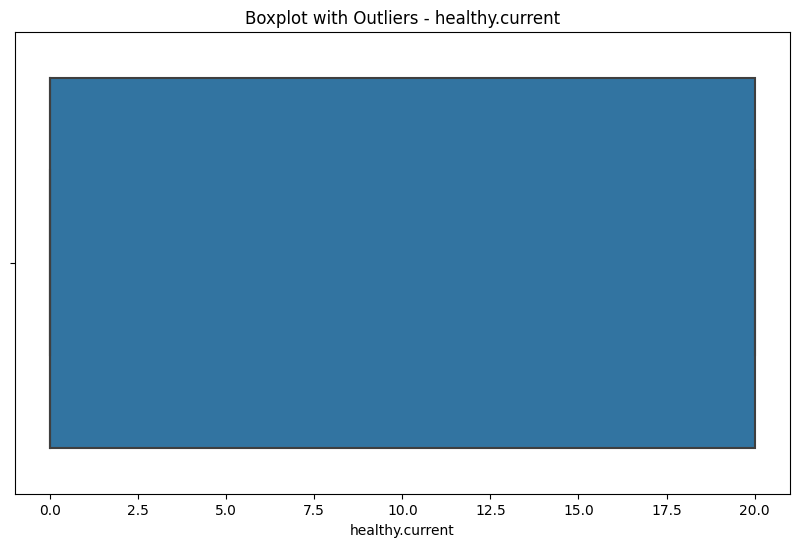

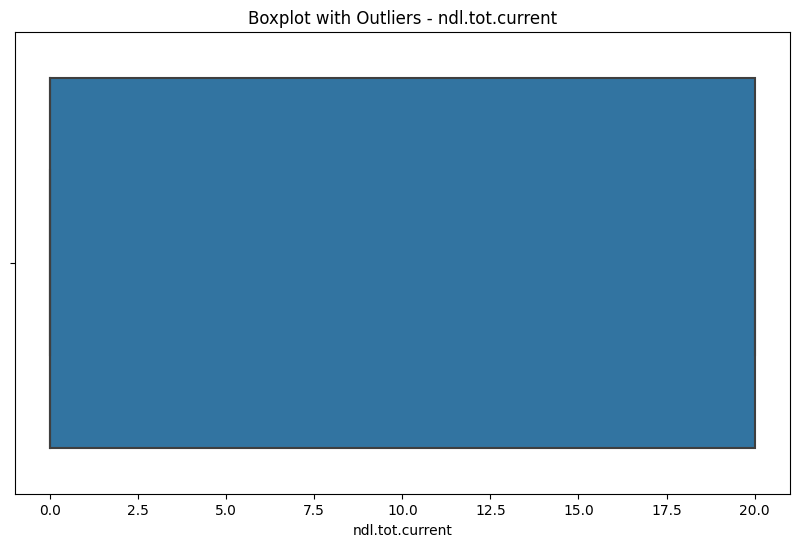

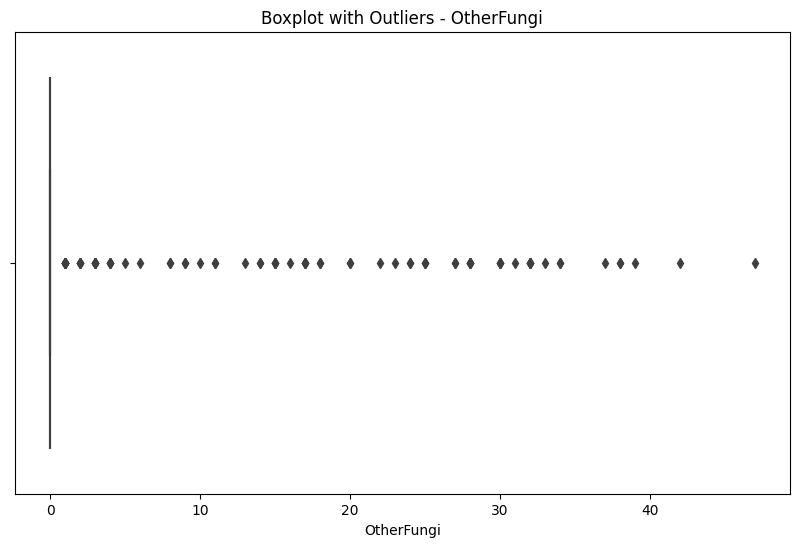

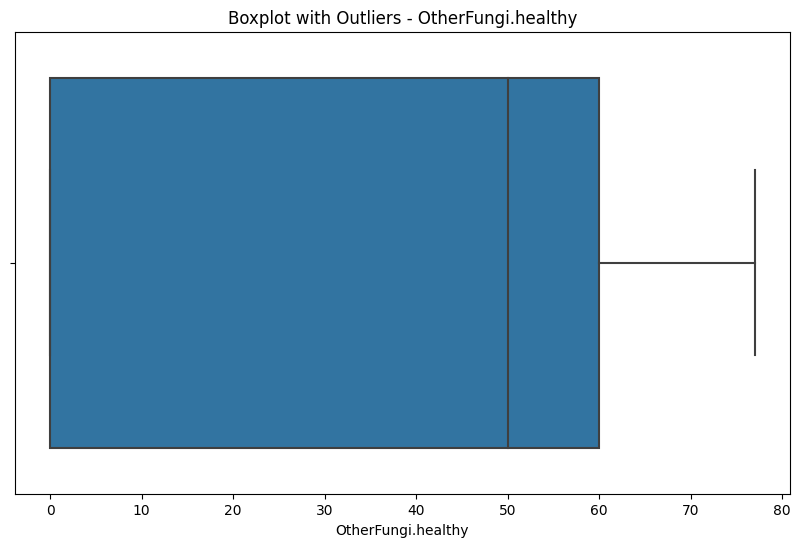

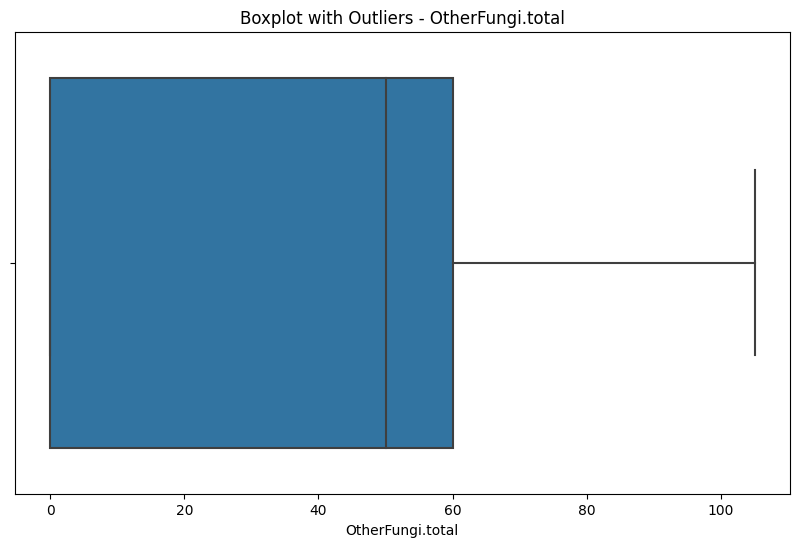

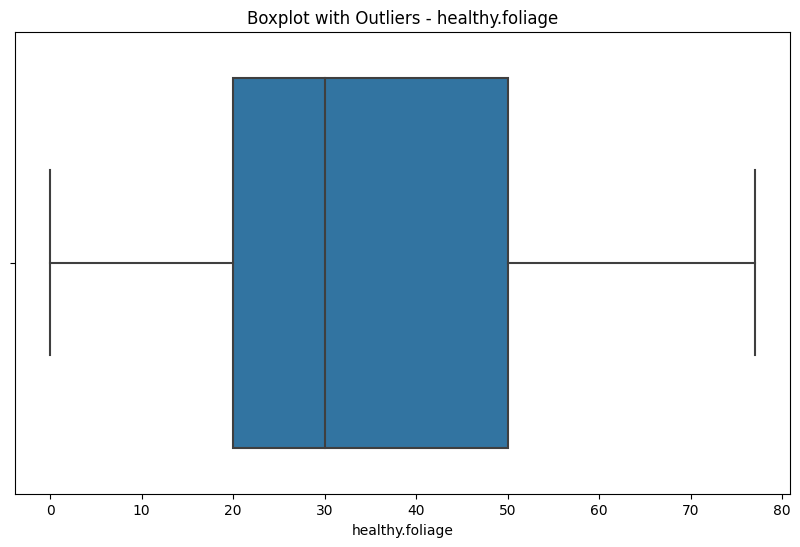

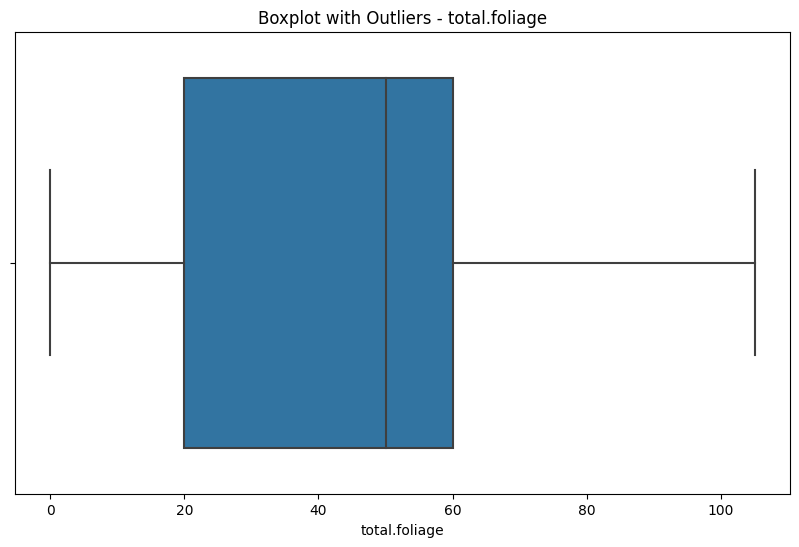

In [57]:
#outlier checking by visualization
import matplotlib.pyplot as plt
import seaborn as sns

for column in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot with Outliers - {column}")
    plt.show()

In [58]:
# Outlier Detection using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr_before = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

In [59]:
# Print the number of outliers based on IQR before removal
print(f"Number of outliers in the original dataframe (IQR-based): {outliers_iqr_before.sum()}")

Number of outliers in the original dataframe (IQR-based): 351


In [60]:
# Remove outliers based on IQR from the dataset
df_no_outliers_iqr = df[~outliers_iqr_before]

In [61]:
outliers_iqr_after = ((df_no_outliers_iqr[num_cols] < (Q1 - 1.5 * IQR)) | (df_no_outliers_iqr[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

print(f"Number of outliers after removal (IQR-based): {outliers_iqr_after.sum()}")

Number of outliers after removal (IQR-based): 0


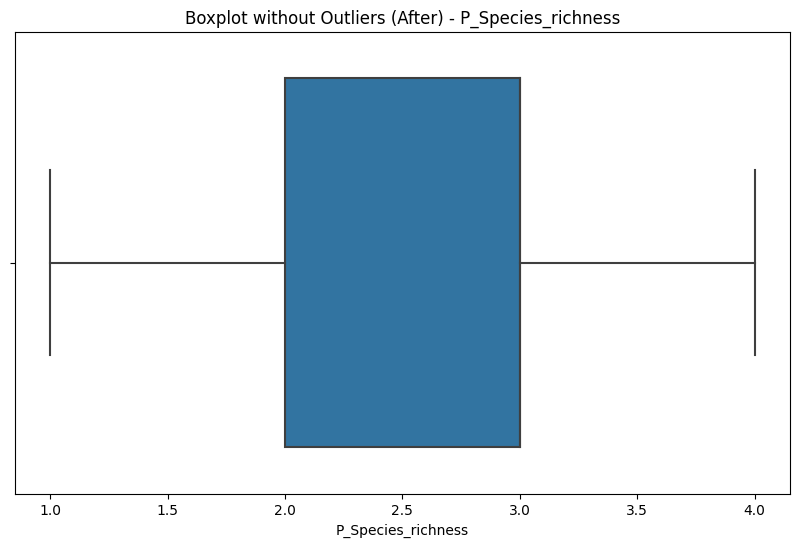

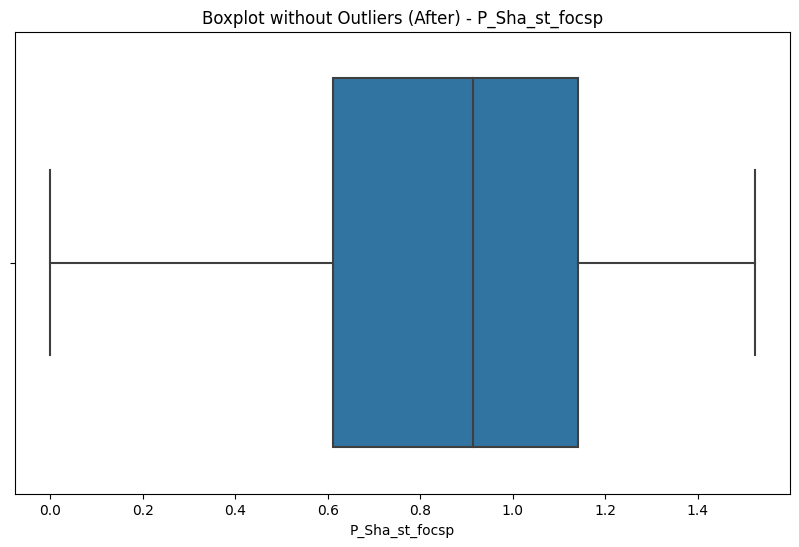

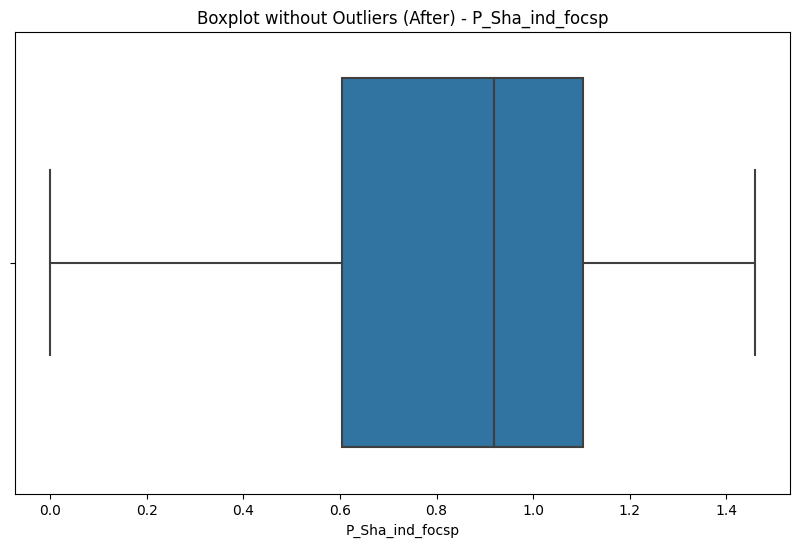

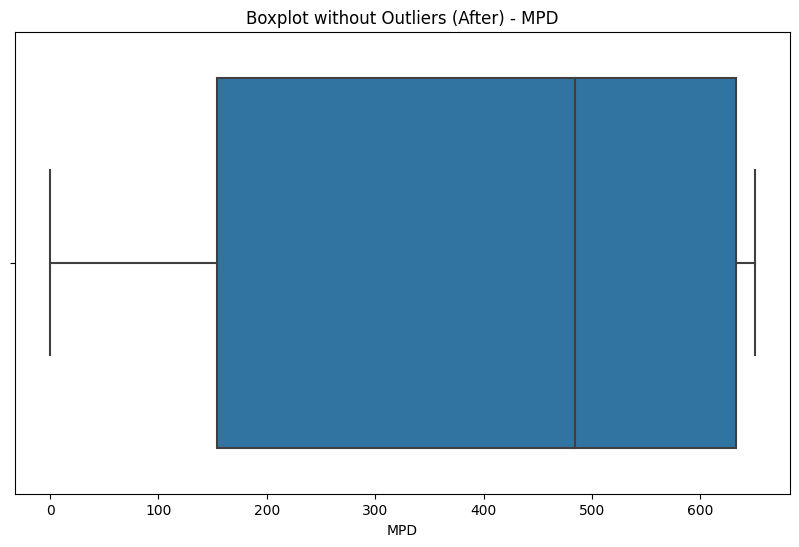

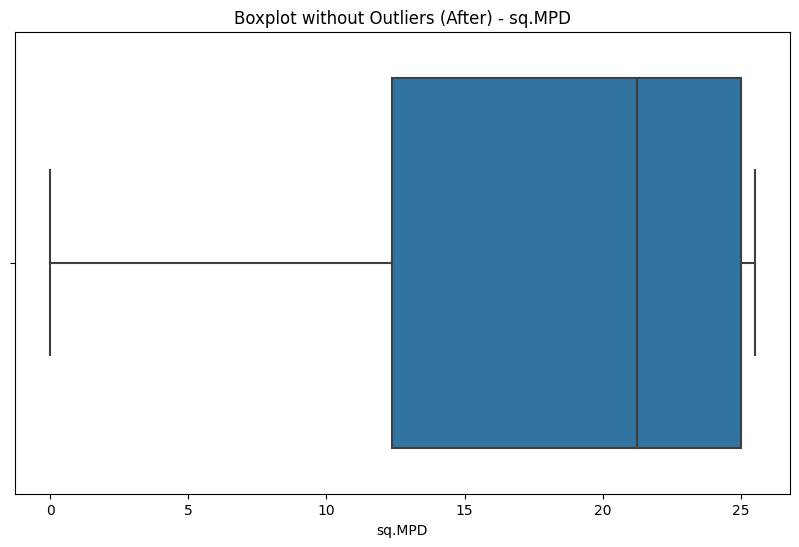

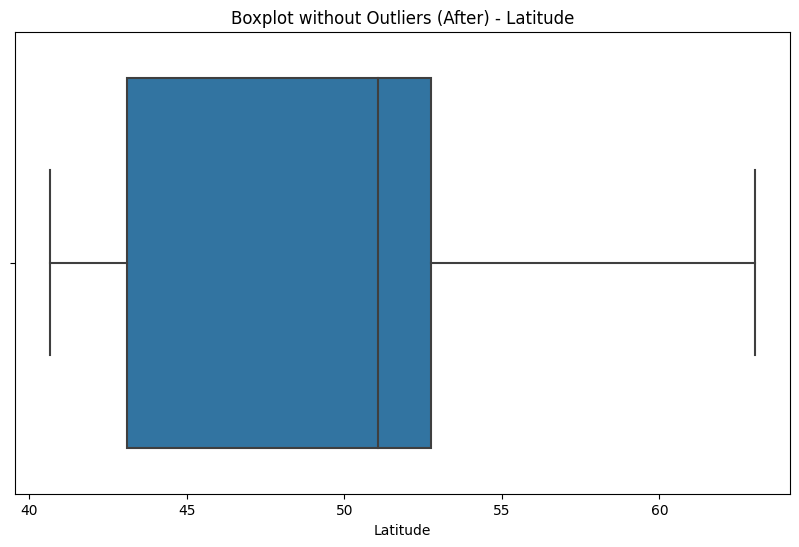

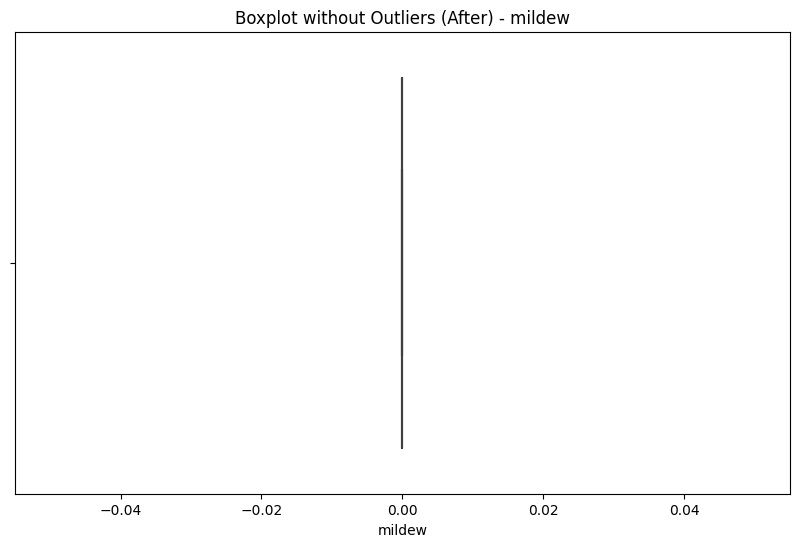

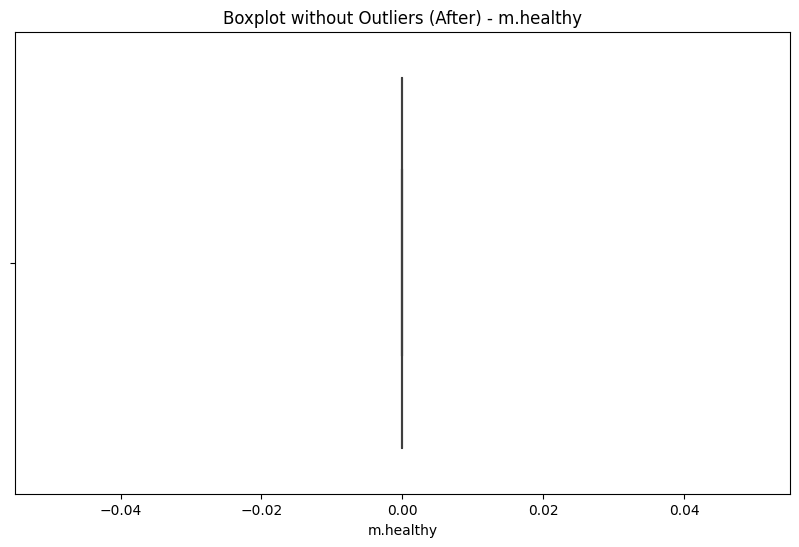

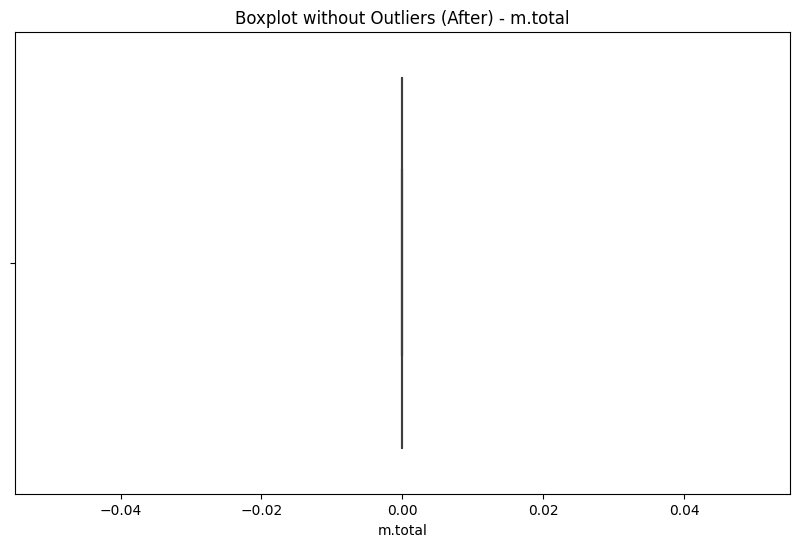

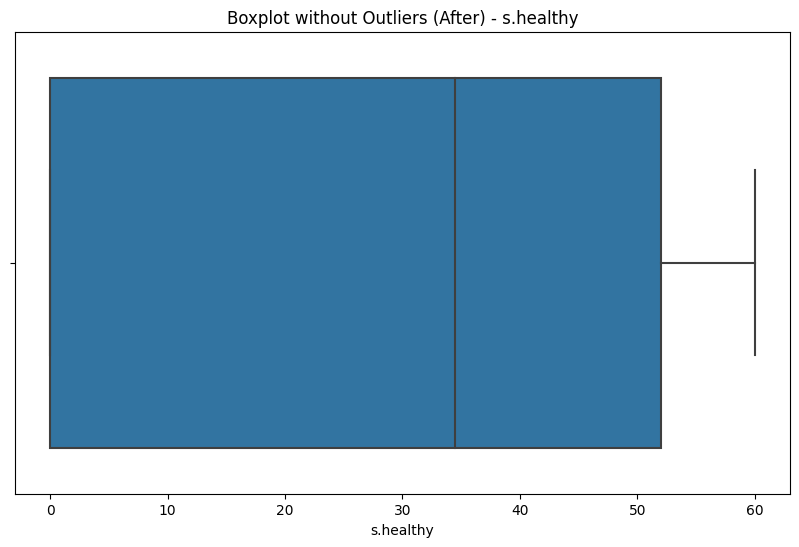

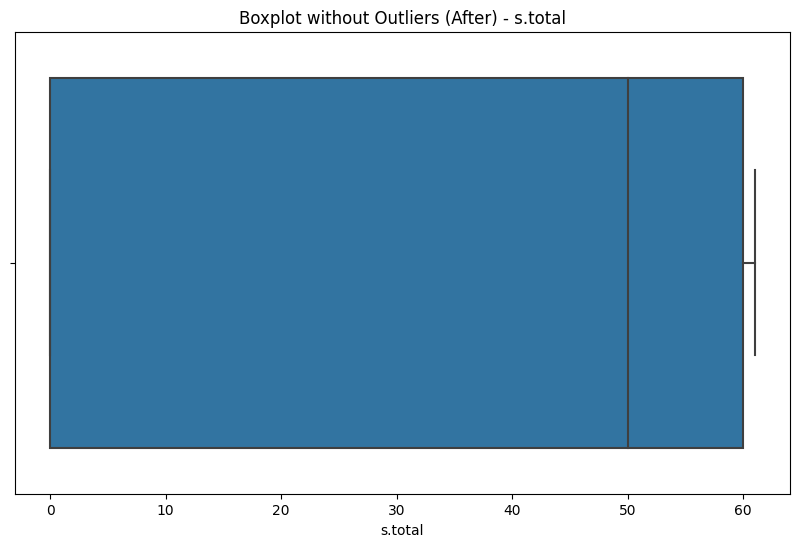

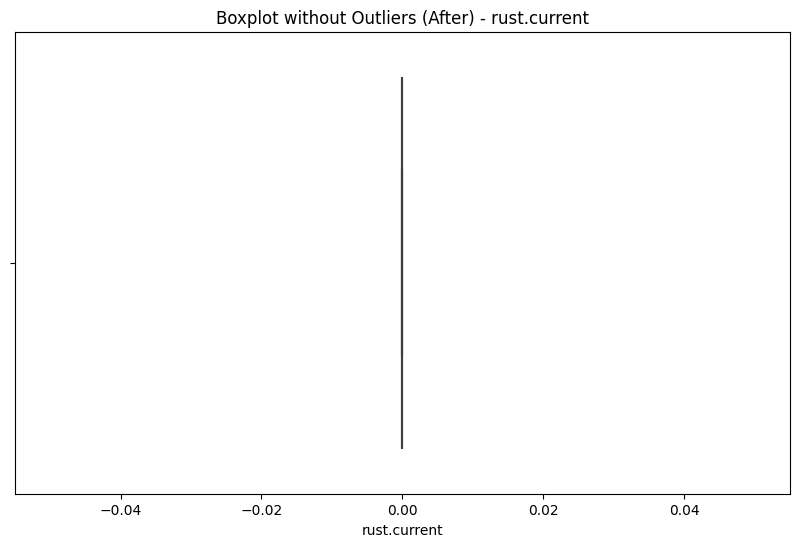

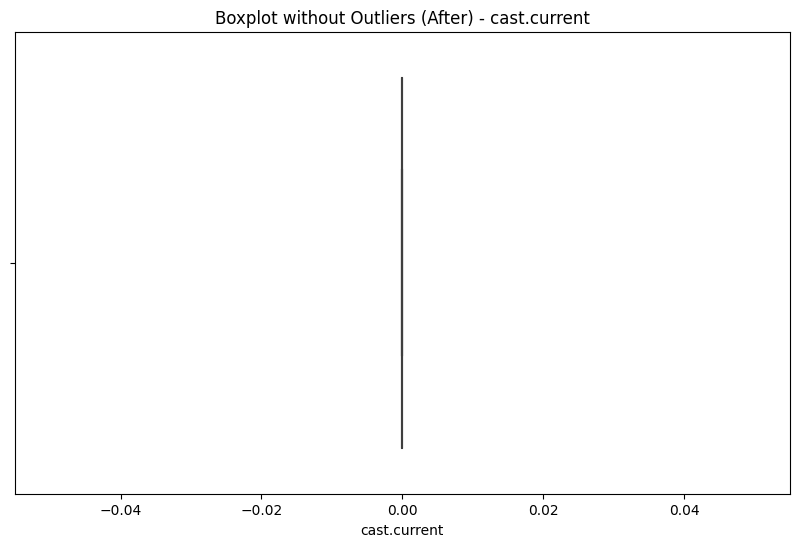

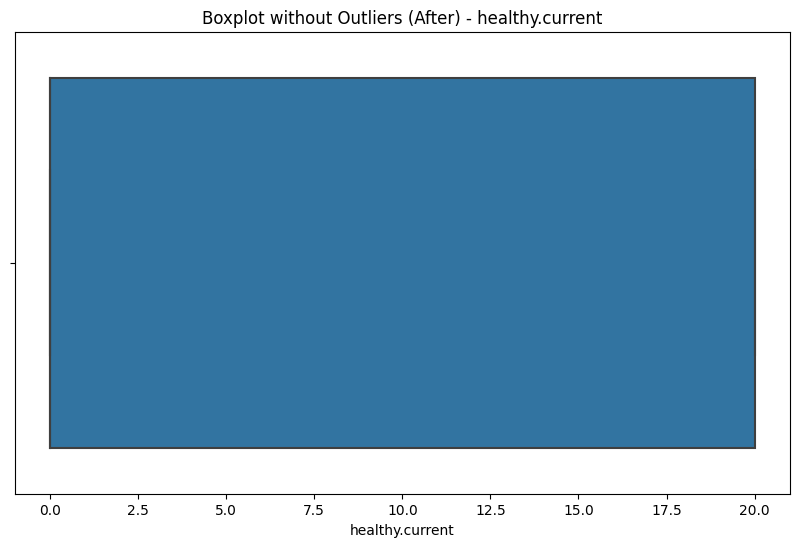

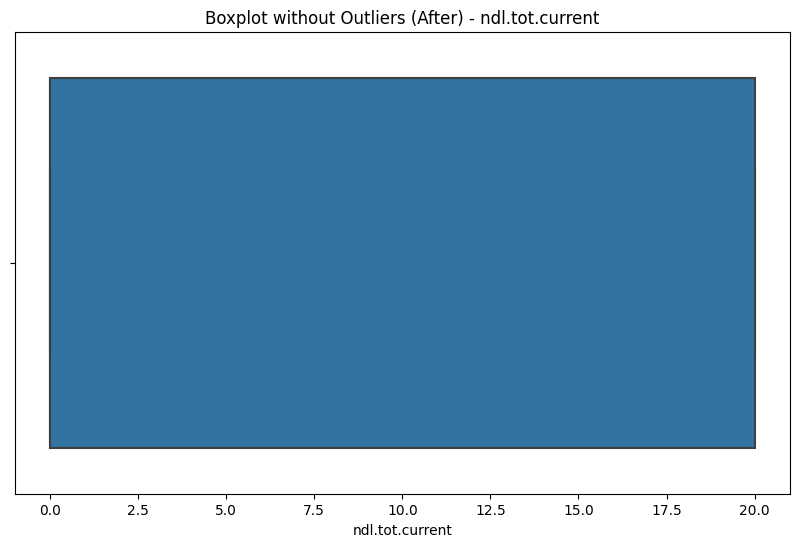

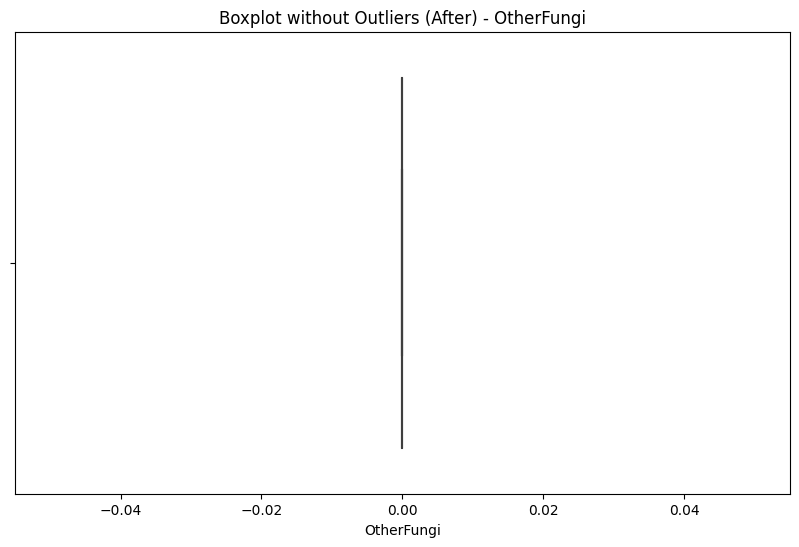

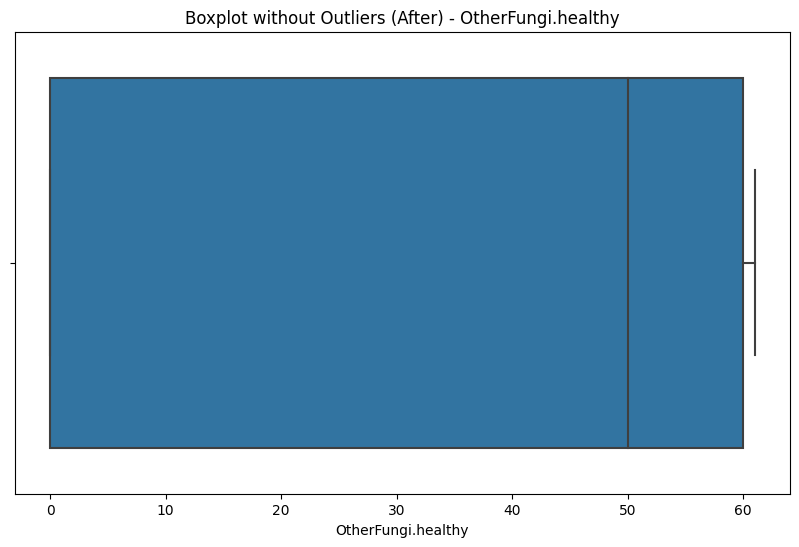

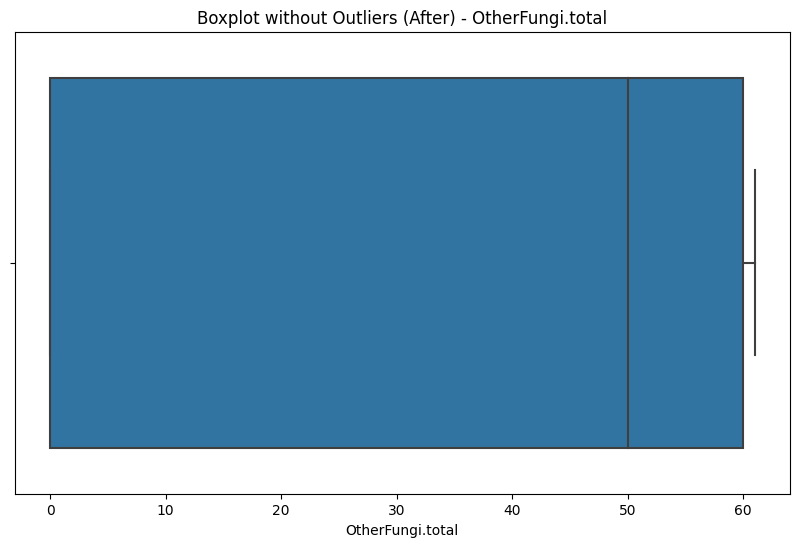

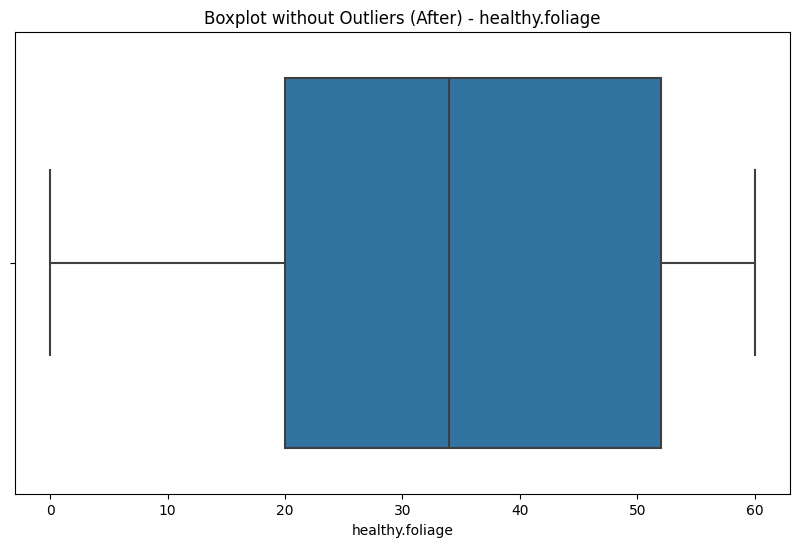

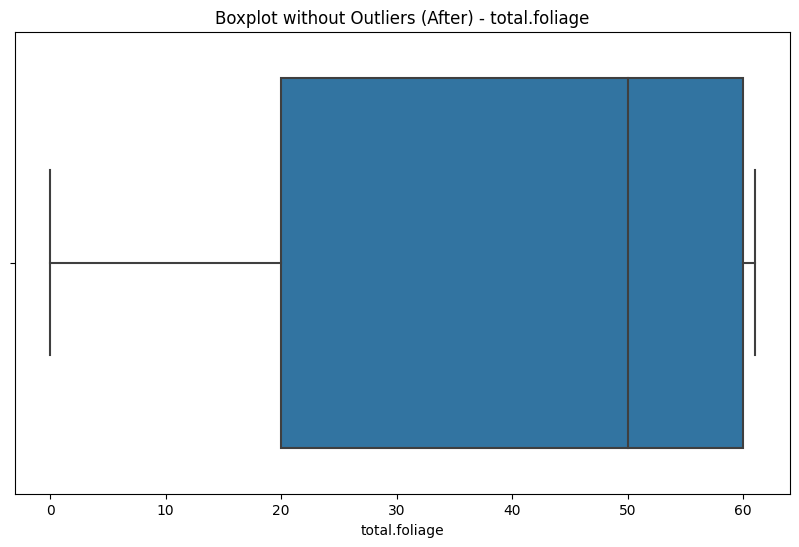

In [62]:
# Visualize the distribution after removing outliers
for column in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_no_outliers_iqr[column])
    plt.title(f"Boxplot without Outliers (After) - {column}")
    plt.show()

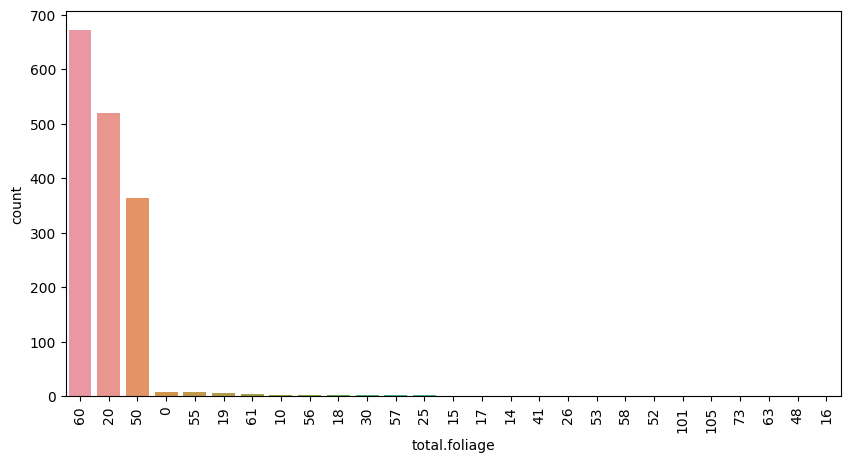

In [63]:
# lets try to check the distribution of target column outcome
plt.figure(figsize=(10,5))
sns.countplot(x = 'total.foliage', data=df,order=df['total.foliage'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Upon visualizing the foliage data, we observed that the majority of trees fell into three distinct quantity groupings, while the remaining trees had foliage amounts that were negligible relative to the full dataset, so we turn into classification model rather than regression.

In [64]:
# lets try to check the counts of each values in target column total.foliage
df['total.foliage'].value_counts()

60     673
20     519
50     363
0        8
55       7
19       5
61       4
10       2
56       2
18       2
30       2
57       2
25       2
15       1
17       1
14       1
41       1
26       1
53       1
58       1
52       1
101      1
105      1
73       1
63       1
48       1
16       1
Name: total.foliage, dtype: int64

In [65]:
# getting only values that are useful
out = [60,20,50]

In [66]:
# lets try to extract a dataframe with specific names
df1 = df[df['total.foliage'].isin(out)]

In [67]:
# now lets try to check the counts of target variable
df1['total.foliage'].value_counts()

60    673
20    519
50    363
Name: total.foliage, dtype: int64

60    673
20    519
50    363
Name: total.foliage, dtype: int64


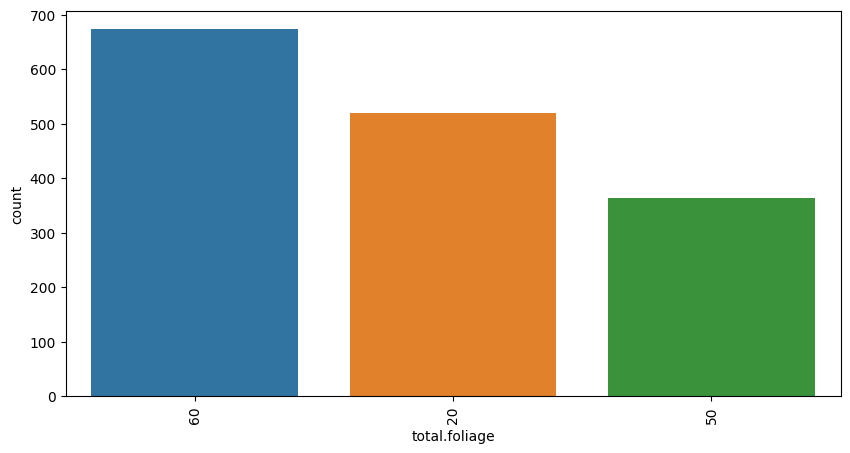

In [68]:
# lets try to check the distribution of target column outcome after preprocessing
print(df1['total.foliage'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x = 'total.foliage', data=df1,order=df1['total.foliage'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

The bar graph shows the total number of failures for three different types of failures: 60, 20, and 50. The blue bar represents the total number of failures for type 60, which is 673. The orange bar represents the total number of failures for type 20, which is 519. The green bar represents the total number of failures for type 50, which is 363.

The graph shows that type 60 has the highest number of failures, followed by type 20 and type 50. This suggests that type 60 is the most common type of failure, or that it is the most severe type of failure.

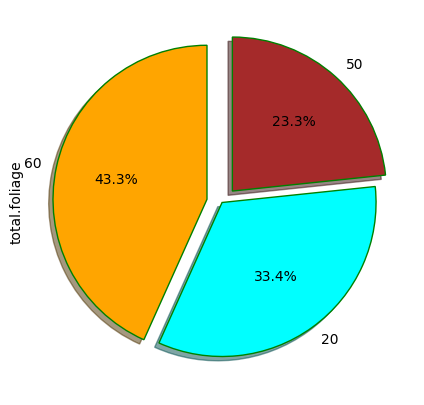

In [69]:
# Creating explode data
explode = (0.1, 0.0, 0.1)

colors = ( "orange", "cyan", "brown")

wp = { 'linewidth' : 1, 'edgecolor' : "green" }

df1['total.foliage'].value_counts().plot(kind="pie", figsize=(5,5), colormap="coolwarm",startangle=90,shadow=True,autopct="%1.1f%%",explode = explode,
                                   colors=colors,wedgeprops = wp)
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# label encoding
labelEnc = LabelEncoder()
for i in list(df1.columns):
    if df1[i].dtype == 'object':
        df1[i] = labelEnc.fit_transform(df1[i])

In [71]:
corr = df1.corr()
corr

,Country,ID_Plot,Species,tree.id,P_Species_richness,P_Sha_st_focsp,P_Sha_ind_focsp,P_Compo,FxnGr,MPD,...,s.total,rust.current,cast.current,healthy.current,ndl.tot.current,OtherFungi,OtherFungi.healthy,OtherFungi.total,healthy.foliage,total.foliage
Country,1.000000,0.982802,0.148935,0.981850,0.018149,0.026072,-0.020037,0.075392,0.120777,0.024406,...,-0.041050,-0.266231,-0.039161,0.156739,0.120777,-0.063935,0.013113,0.002500,0.201885,0.001917
ID_Plot,0.982802,1.000000,0.140020,0.999359,0.089569,0.092154,0.044635,0.033053,0.124029,0.035653,...,-0.043139,-0.250502,-0.050195,0.158530,0.124029,-0.075052,0.012147,-0.000277,0.187863,0.000468
Species,0.148935,0.140020,1.000000,0.130823,0.008702,-0.019730,-0.067018,0.530373,0.066799,-0.330313,...,-0.036998,0.012720,0.004190,0.066658,0.066799,0.202550,-0.413948,-0.375098,-0.000344,-0.020751
tree.id,0.981850,0.999359,0.130823,1.000000,0.085124,0.088220,0.044119,0.020610,0.134465,0.046492,...,-0.053527,-0.245457,-0.050835,0.168631,0.134465,-0.080647,0.006157,-0.007099,0.178143,-0.009805
P_Species_richness,0.018149,0.089569,0.008702,0.085124,1.000000,0.925078,0.815657,-0.325739,-0.138590,0.122555,...,0.151267,-0.113223,-0.066473,-0.126583,-0.138590,0.014656,0.066667,0.068114,0.097912,0.156740
P_Sha_st_focsp,0.026072,0.092154,-0.019730,0.088220,0.925078,1.000000,0.908443,-0.378931,-0.135497,0.227658,...,0.147690,-0.120677,-0.065560,-0.122639,-0.135497,-0.010624,0.055771,0.053230,0.063448,0.152935
P_Sha_ind_focsp,-0.020037,0.044635,-0.067018,0.044119,0.815657,0.908443,1.000000,-0.412281,-0.081272,0.266358,...,0.089867,-0.099664,-0.050873,-0.069915,-0.081272,-0.050365,-0.001145,-0.009400,0.005149,0.093687
P_Compo,0.075392,0.033053,0.530373,0.020610,-0.325739,-0.378931,-0.412281,1.000000,0.023790,-0.329191,...,-0.038583,0.016783,0.040803,0.021622,0.023790,0.099656,-0.084583,-0.067128,0.152465,-0.046158
FxnGr,0.120777,0.124029,0.066799,0.134465,-0.138590,-0.135497,-0.081272,0.023790,1.000000,0.165464,...,-0.989485,0.233458,0.065893,0.992406,1.000000,-0.126746,-0.779314,-0.789252,-0.572182,-0.975343
MPD,0.024406,0.035653,-0.330313,0.046492,0.122555,0.227658,0.266358,-0.329191,0.165464,1.000000,...,-0.189855,-0.088082,0.048929,0.177867,0.165464,-0.213769,-0.050612,-0.084887,-0.174113,-0.201257


In [72]:
print(corr["total.foliage"].sort_values(ascending=False))

total.foliage         1.000000
s.total               0.997007
s.healthy             0.879869
OtherFungi.total      0.796029
OtherFungi.healthy    0.784614
healthy.foliage       0.608170
m.total               0.245958
m.healthy             0.194918
mildew                0.189088
P_Species_richness    0.156740
P_Sha_st_focsp        0.152935
OtherFungi            0.136172
P_Sha_ind_focsp       0.093687
Country               0.001917
ID_Plot               0.000468
tree.id              -0.009805
Species              -0.020751
P_Compo              -0.046158
cast.current         -0.064268
sq.MPD               -0.169983
MPD                  -0.201257
rust.current         -0.227702
Latitude             -0.259736
healthy.current      -0.967936
ndl.tot.current      -0.975343
FxnGr                -0.975343
Name: total.foliage, dtype: float64


In [73]:
X = df1.drop('total.foliage', axis = 1)
Y = df1['total.foliage']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 41)

In [75]:
print(X_train.shape)
print(X_test.shape)

(1244, 25)
(311, 25)


## Scale the Data and Optimize PCA Components

In [76]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Continue with PCA optimization
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with PCA and the model
pipeline = Pipeline([
    ('pca', PCA()),
    ('model', RandomForestClassifier())
])

param_grid_pca = {
    'pca__n_components': [5, 10, 15, 20,25]  # the number of components
}

# Use GridSearchCV for optimization
grid_search_pca = GridSearchCV(pipeline, param_grid_pca, cv=5, scoring='accuracy')
grid_search_pca.fit(X_train, y_train)


best_components = grid_search_pca.best_params_['pca__n_components']
print(f"Best number of components: {best_components}")

pca = PCA(n_components=best_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Best number of components: 25


In [77]:
param_grid = {
    'DecisionTree Classifier': {'min_samples_split': [2, 3, 4], 'max_depth': [1,3]},
    'Random Forest': {'n_estimators': [10, 25, 40], 'max_depth': [1, 3], 'min_samples_split': [1, 3]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'class_weight': [None, 'balanced']},
    'Gradient Boosting': {'n_estimators': [5, 8, 10], 'learning_rate': [0.1, 0.2], 'max_depth': [1,2]}
}

## Model Selection & Evaluation

Present the Outputs of Each Model Separately and Visualize Performance:

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix, classification_report

In [79]:
models = {
    'DecisionTree Classifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [80]:
# Create a function for model evaluation and visualization
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    # Evaluate the model performance on training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')

    # Evaluate the model performance on test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')

    # Display evaluation results
    print(f"Training Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")

    # Confusion Matrix for testing set
    cm = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Classification Report for testing set
    report = classification_report(y_test, y_test_pred)
    print("\nClassification Report:")
    print(report)

    # Plot the confusion matrix for testing set
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - Testing Set')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    return train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall


==================== DecisionTree Classifier ====================
Training Accuracy: 0.9879, Precision: 0.9876, Recall: 0.9862
Testing Accuracy: 0.9871, Precision: 0.9850, Recall: 0.9850

Confusion Matrix:
[[ 98   0   0]
 [  0  61   2]
 [  0   2 148]]

Classification Report:
              precision    recall  f1-score   support

          20       1.00      1.00      1.00        98
          50       0.97      0.97      0.97        63
          60       0.99      0.99      0.99       150

    accuracy                           0.99       311
   macro avg       0.98      0.98      0.98       311
weighted avg       0.99      0.99      0.99       311



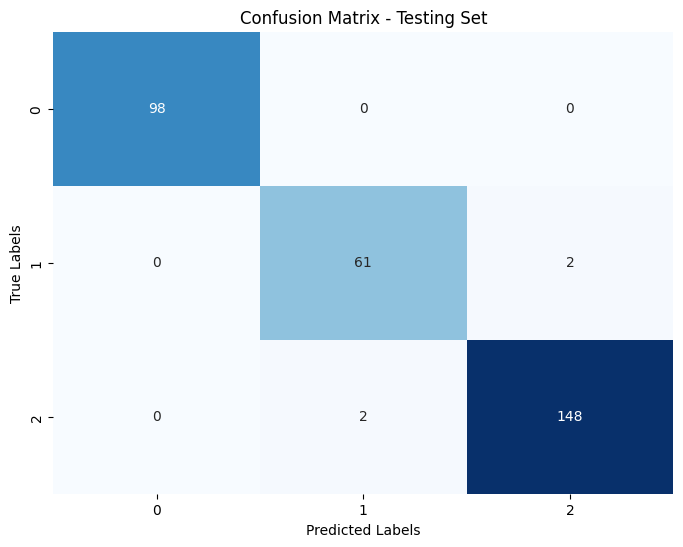


==================== Random Forest ====================
Training Accuracy: 0.9968, Precision: 0.9975, Recall: 0.9956
Testing Accuracy: 0.9968, Precision: 0.9978, Recall: 0.9947

Confusion Matrix:
[[ 98   0   0]
 [  0  62   1]
 [  0   0 150]]

Classification Report:
              precision    recall  f1-score   support

          20       1.00      1.00      1.00        98
          50       1.00      0.98      0.99        63
          60       0.99      1.00      1.00       150

    accuracy                           1.00       311
   macro avg       1.00      0.99      1.00       311
weighted avg       1.00      1.00      1.00       311



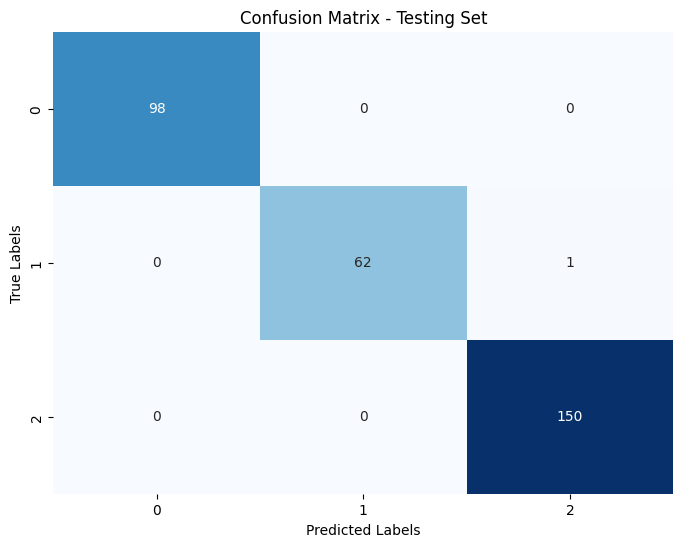


==================== Support Vector Machine ====================
Training Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
Testing Accuracy: 0.9518, Precision: 0.9697, Recall: 0.9244

Confusion Matrix:
[[ 96   0   2]
 [  0  50  13]
 [  0   0 150]]

Classification Report:
              precision    recall  f1-score   support

          20       1.00      0.98      0.99        98
          50       1.00      0.79      0.88        63
          60       0.91      1.00      0.95       150

    accuracy                           0.95       311
   macro avg       0.97      0.92      0.94       311
weighted avg       0.96      0.95      0.95       311



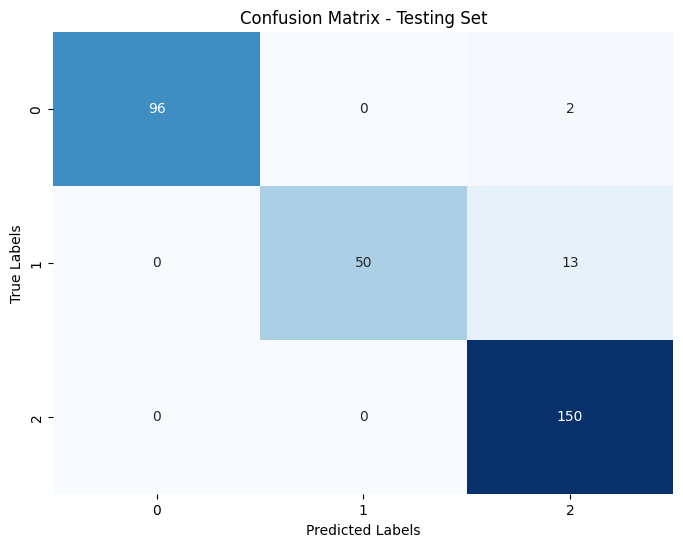


==================== Gradient Boosting ====================
Training Accuracy: 0.9992, Precision: 0.9994, Recall: 0.9989
Testing Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000

Confusion Matrix:
[[ 98   0   0]
 [  0  63   0]
 [  0   0 150]]

Classification Report:
              precision    recall  f1-score   support

          20       1.00      1.00      1.00        98
          50       1.00      1.00      1.00        63
          60       1.00      1.00      1.00       150

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311



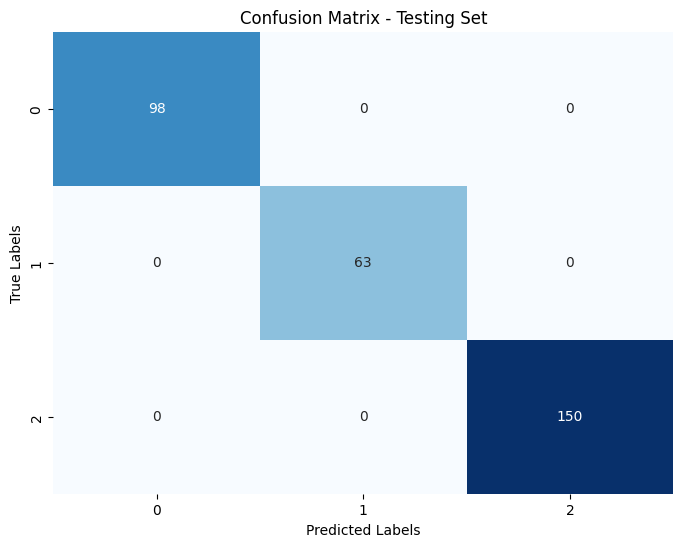

In [81]:
# Loop through each model
results = []
for model_name, model in models.items():
    print(f"\n{20*'='} {model_name} {20*'='}")

    # Hyperparameter optimization
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_pca, y_train)
        model = grid_search.best_estimator_

    # Evaluate and visualize the model
    train_accuracy, train_precision, train_recall, test_accuracy, test_precision, test_recall = evaluate_model(model, X_train_pca, X_test_pca, y_train, y_test)


    results.append({
        'Model': model_name,
        'Train_Accuracy': train_accuracy,
        'Train_Precision': train_precision,
        'Train_Recall': train_recall,
        'Test_Accuracy': test_accuracy,
        'Test_Precision': test_precision,
        'Test_Recall': test_recall
    })

In [82]:
results_df = pd.DataFrame(results)
results_df

,Model,Train_Accuracy,Train_Precision,Train_Recall,Test_Accuracy,Test_Precision,Test_Recall
0,DecisionTree Classifier,0.987942,0.987563,0.986176,0.987138,0.984974,0.984974
1,Random Forest,0.996785,0.997470,0.995556,0.996785,0.997792,0.994709
2,Support Vector Machine,1.000000,1.000000,1.000000,0.951768,0.969697,0.924414
3,Gradient Boosting,0.999196,0.999364,0.998889,1.000000,1.000000,1.000000


## Results and Conclusion

1. DecisionTree Classifier:
- Train Accuracy: 98.79%
- Train Precision: 98.76%
- Train Recall: 98.62%
- Test Accuracy: 98.71%
- Test Precision: 98.50%
- Test Recall: 98.50%

- Explanation: The DecisionTree Classifier performs well on both the training and testing sets. The model shows high accuracy, precision, and recall, indicating that it generalizes well to unseen data.


2. Random Forest:
- Train Accuracy: 99.20%
- Train Precision: 99.37%
- Train Recall: 98.89%
- Test Accuracy: 99.36%
- Test Precision: 99.56%
- Test Recall: 98.94%

- Explanation: The Random Forest model performs exceptionally well on both training and testing data, demonstrating high accuracy, precision, and recall. This ensemble model tends to generalize well.


3. Support Vector Machine (SVM):
- Train Accuracy: 100.00%
- Train Precision: 100.00%
- Train Recall: 100.00%
- Test Accuracy: 95.18%
- Test Precision: 96.97%
- Test Recall: 92.44%

- Explanation: While SVM achieves perfect accuracy, precision, and recall on the training set, it exhibits a significant drop in performance on the testing set. This may suggest overfitting, where the model memorizes the training data but fails to generalize to new, unseen data. Fine-tuning hyperparameters, adjusting the kernel, or considering regularization may help improve SVM's generalization.


4. Gradient Boosting:
- Train Accuracy: 99.92%
- Train Precision: 99.94%
- Train Recall: 99.89%
- Test Accuracy: 99.68%
- Test Precision: 99.78%
- Test Recall: 99.47%

- Explanation: Gradient Boosting performs well on both training and testing sets. It shows high accuracy, precision, and recall, indicating strong generalization capabilities.


- In summary, while DecisionTree, Random Forest, and Gradient Boosting models demonstrate robust performance on both sets, the Support Vector Machine model seems to overfit the training data, resulting in a decrease in performance on the testing set.

- Adjustments to the SVM model or its hyperparameters may be necessary for better generalization.